In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

##West Dataset

In [ ]:
df = pd.read_csv('regular_dataset_r3_2xlarge_us-west-2a.csv', index_col='Time', parse_dates=True)
df

,Unnamed: 0,Price
Time,,
2021-03-29,0,0.157533
2021-03-30,1,0.158067
2021-03-31,2,0.158300
2021-04-01,3,0.158625
2021-04-02,4,0.159125
...,...,...
2021-06-23,86,0.131600
2021-06-24,87,0.131400
2021-06-25,88,0.131350


In [ ]:
df = df[["Price"]]

<Axes: xlabel='Time'>

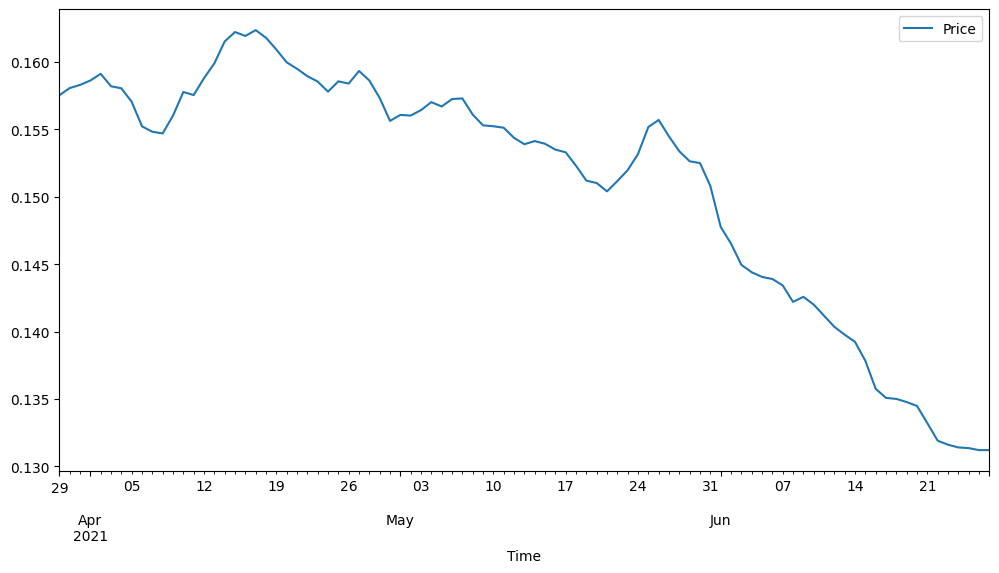

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from prophet import Prophet


In [ ]:
df= df.reset_index()

In [ ]:
df = df.rename(columns = {"Time":"ds","Price":"y"})

In [ ]:
train = df.iloc[:72]
test = df.iloc[72:]

In [ ]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m5mgvwj/z_3r8g68.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m5mgvwj/ly8mjbqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72621', 'data', 'file=/tmp/tmp8m5mgvwj/z_3r8g68.json', 'init=/tmp/tmp8m5mgvwj/ly8mjbqc.json', 'output', 'file=/tmp/tmp8m5mgvwj/prophet_modelloakiwnr/prophet_model-20231206000909.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:09:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:09:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
predictions = m.predict(test)

In [ ]:
predictions.index=predictions["ds"]

In [ ]:
predictions.index = test.index

In [ ]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
72,2021-06-09,-0.005972,0.140887,0.144651,-0.005998,-0.005946,0.148765,0.148765,0.148765,0.148636,0.148636,0.148636,0.000129,0.000129,0.000129,0.0,0.0,0.0,0.142794
73,2021-06-10,-0.006639,0.139971,0.143874,-0.006746,-0.006552,0.148539,0.148539,0.148539,0.148636,0.148636,0.148636,-0.000098,-0.000098,-0.000098,0.0,0.0,0.0,0.141899
74,2021-06-11,-0.007307,0.139191,0.142916,-0.007515,-0.007125,0.148441,0.148441,0.148441,0.148636,0.148636,0.148636,-0.000195,-0.000195,-0.000195,0.0,0.0,0.0,0.141134
75,2021-06-12,-0.007975,0.138692,0.142591,-0.008314,-0.007662,0.148583,0.148583,0.148583,0.148636,0.148636,0.148636,-0.000054,-0.000054,-0.000054,0.0,0.0,0.0,0.140608
76,2021-06-13,-0.008642,0.138113,0.141999,-0.009109,-0.008199,0.148708,0.148708,0.148708,0.148636,0.148636,0.148636,0.000072,0.000072,0.000072,0.0,0.0,0.0,0.140066
77,2021-06-14,-0.009310,0.137443,0.141396,-0.009955,-0.008703,0.148719,0.148719,0.148719,0.148636,0.148636,0.148636,0.000083,0.000083,0.000083,0.0,0.0,0.0,0.139409
78,2021-06-15,-0.009977,0.136700,0.140850,-0.010762,-0.009207,0.148699,0.148699,0.148699,0.148636,0.148636,0.148636,0.000063,0.000063,0.000063,0.0,0.0,0.0,0.138722
79,2021-06-16,-0.010645,0.136166,0.140273,-0.011575,-0.009655,0.148765,0.148765,0.148765,0.148636,0.148636,0.148636,0.000129,0.000129,0.000129,0.0,0.0,0.0,0.138120
80,2021-06-17,-0.011313,0.134999,0.139504,-0.012479,-0.010112,0.148539,0.148539,0.148539,0.148636,0.148636,0.148636,-0.000098,-0.000098,-0.000098,0.0,0.0,0.0,0.137226
81,2021-06-18,-0.011980,0.134020,0.138837,-0.013366,-0.010565,0.148441,0.148441,0.148441,0.148636,0.148636,0.148636,-0.000195,-0.000195,-0.000195,0.0,0.0,0.0,0.136461


In [ ]:
train.set_index(["ds"],inplace=True)

In [ ]:
test.set_index(["ds"],inplace=True)

In [ ]:
predictions = predictions[["ds","yhat"]]
predictions.set_index(["ds"],inplace=True)

In [ ]:
test

,y
ds,
2021-06-09,0.142575
2021-06-10,0.142000
2021-06-11,0.141175
2021-06-12,0.140350
2021-06-13,0.139767
2021-06-14,0.139233
2021-06-15,0.137825
2021-06-16,0.135750
2021-06-17,0.135075


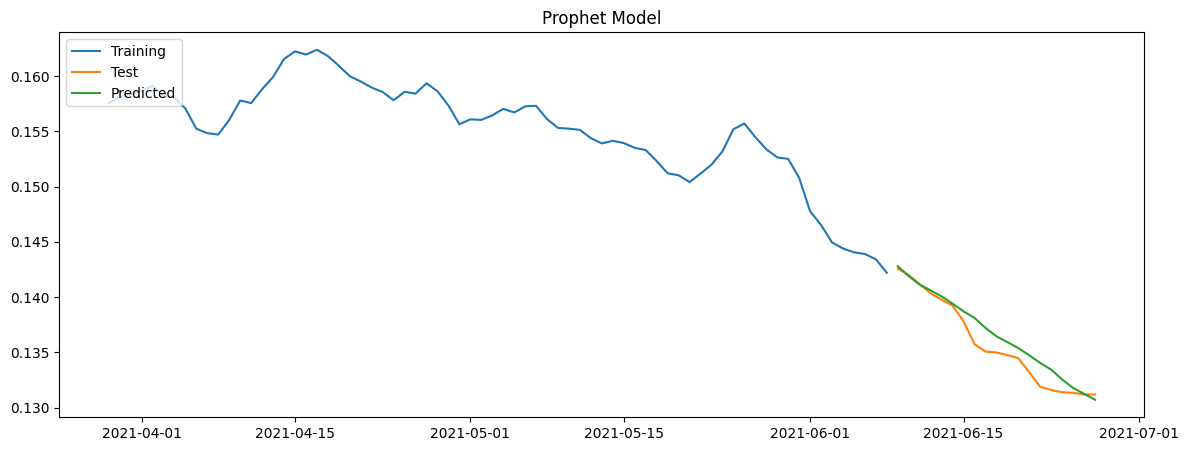

In [ ]:
# Plotting
plt.figure(figsize=(14, 5))
plt.plot(train['y'], label='Training')
plt.plot(test['y'], label='Test')
plt.plot(predictions["yhat"], label='Predicted')
plt.legend(loc="upper left")
plt.title('Prophet Model')
plt.show()


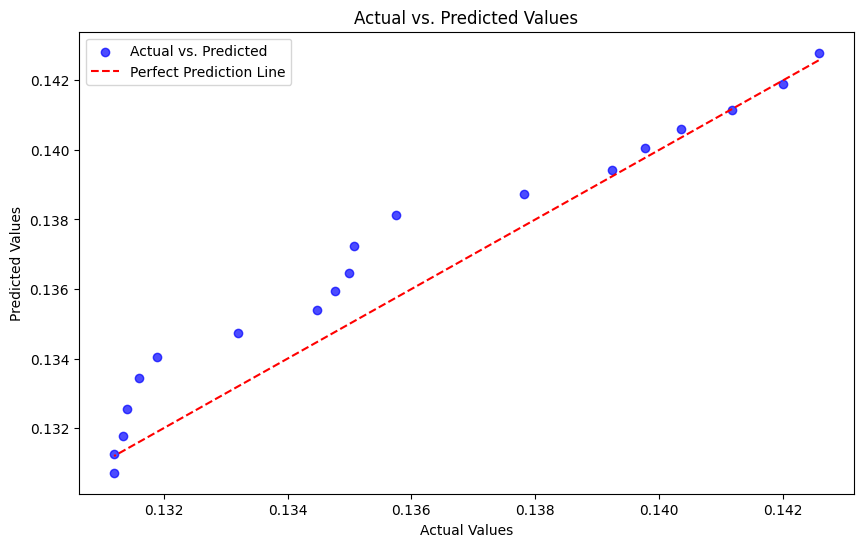

In [ ]:
# Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(test['y'], predictions["yhat"], color='blue', label='Actual vs. Predicted', alpha=0.7)
plt.plot(test['y'], test['y'], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

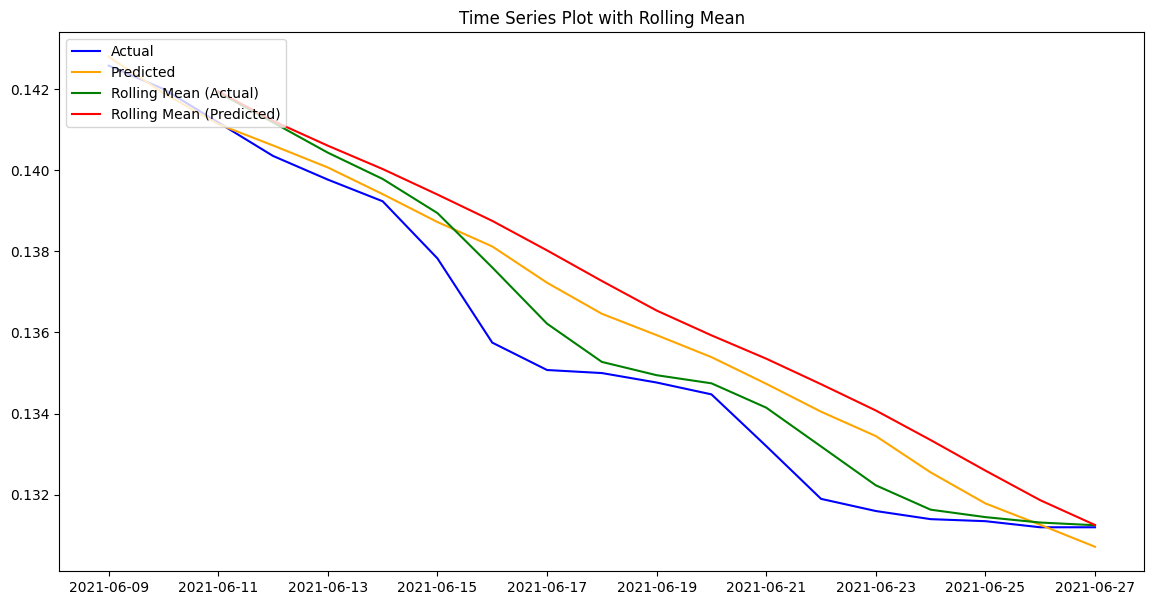

In [ ]:
# Time Series Plot with Rolling Mean
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['y'], label='Actual', color='blue')
plt.plot(predictions.index, predictions["yhat"], label='Predicted', color='orange')
rolling_mean_actual = test['y'].rolling(window=3).mean()
plt.plot(test.index, rolling_mean_actual, label='Rolling Mean (Actual)', color='green')
rolling_mean_predicted = predictions["yhat"].rolling(window=3).mean()
plt.plot(predictions.index, rolling_mean_predicted, label='Rolling Mean (Predicted)', color='red')
plt.legend(loc='upper left')
plt.title('Time Series Plot with Rolling Mean')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(test['y'], predictions['yhat']))
print("RMSE:", rmse)

RMSE: 0.0012091128260827747


In [ ]:
r2 = r2_score(test['y'], predictions['yhat'])
print("R^2:", r2)

R^2: 0.904425719588722


## East dataset

In [ ]:
df = pd.read_csv('/content/regular_dataset_r3_2xlarge_us-east-1b.csv', index_col='Time', parse_dates=True)
df

,Unnamed: 0,Price
Time,,
2021-04-03,0,0.137033
2021-04-04,1,0.137575
2021-04-05,2,0.138600
2021-04-06,3,0.139000
2021-04-07,4,0.140125
...,...,...
2021-06-23,81,0.158100
2021-06-24,82,0.157633
2021-06-25,83,0.158100


In [ ]:
df = df[["Price"]]

In [ ]:
df= df.reset_index()

In [ ]:
df = df.rename(columns = {"Time":"ds","Price":"y"})

In [ ]:
df

,ds,y
0,2021-04-03,0.137033
1,2021-04-04,0.137575
2,2021-04-05,0.138600
3,2021-04-06,0.139000
4,2021-04-07,0.140125
...,...,...
81,2021-06-23,0.158100
82,2021-06-24,0.157633
83,2021-06-25,0.158100
84,2021-06-26,0.157200


In [ ]:
train = df.iloc[:67]
test = df.iloc[67:]

In [ ]:
m = Prophet() # the Prophet class (model)
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m5mgvwj/b71_z2or.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m5mgvwj/9z4cuiwq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29469', 'data', 'file=/tmp/tmp8m5mgvwj/b71_z2or.json', 'init=/tmp/tmp8m5mgvwj/9z4cuiwq.json', 'output', 'file=/tmp/tmp8m5mgvwj/prophet_model4y22cy37/prophet_model-20231206001355.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:13:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
m.model.make_future_dataframe(periods=15*24, freq='H')

AttributeError: ignored

In [ ]:
predictions = m.predict(test)
predictions.index=predictions["ds"]
predictions.index = test.index

In [ ]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
67,2021-06-09,0.142526,0.140307,0.144211,0.142502,0.142549,-0.000126,-0.000126,-0.000126,-0.000126,-0.000126,-0.000126,0.0,0.0,0.0,0.142399
68,2021-06-10,0.142039,0.140096,0.143894,0.141946,0.142126,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.0,0.0,0.0,0.141964
69,2021-06-11,0.141552,0.139528,0.143354,0.141364,0.141731,-0.000134,-0.000134,-0.000134,-0.000134,-0.000134,-0.000134,0.0,0.0,0.0,0.141418
70,2021-06-12,0.141065,0.139123,0.143052,0.140762,0.141379,0.000034,0.000034,0.000034,0.000034,0.000034,0.000034,0.0,0.0,0.0,0.141099
71,2021-06-13,0.140578,0.138719,0.142708,0.140129,0.141028,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.0,0.0,0.0,0.140630
72,2021-06-14,0.140091,0.138170,0.142311,0.139485,0.140687,0.000087,0.000087,0.000087,0.000087,0.000087,0.000087,0.0,0.0,0.0,0.140177
73,2021-06-15,0.139604,0.137828,0.141832,0.138843,0.140389,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.0,0.0,0.0,0.139766
74,2021-06-16,0.139117,0.136949,0.141043,0.138198,0.140089,-0.000126,-0.000126,-0.000126,-0.000126,-0.000126,-0.000126,0.0,0.0,0.0,0.138990
75,2021-06-17,0.138630,0.136242,0.140808,0.137535,0.139802,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.0,0.0,0.0,0.138555
76,2021-06-18,0.138143,0.135798,0.140568,0.136833,0.139523,-0.000134,-0.000134,-0.000134,-0.000134,-0.000134,-0.000134,0.0,0.0,0.0,0.138009


In [ ]:
test

,y
ds,
2021-06-09,0.148975
2021-06-10,0.149267
2021-06-11,0.150100
2021-06-12,0.150475
2021-06-13,0.150550
2021-06-14,0.151020
2021-06-15,0.150625
2021-06-16,0.150250
2021-06-17,0.150920


In [ ]:
test.set_index(["ds"],inplace=True)

In [ ]:
predictions.set_index(["ds"],inplace=True)

In [ ]:
predictions

,yhat
ds,
2021-06-09,0.142399
2021-06-10,0.141964
2021-06-11,0.141418
2021-06-12,0.141099
2021-06-13,0.140630
2021-06-14,0.140177
2021-06-15,0.139766
2021-06-16,0.138990
2021-06-17,0.138555


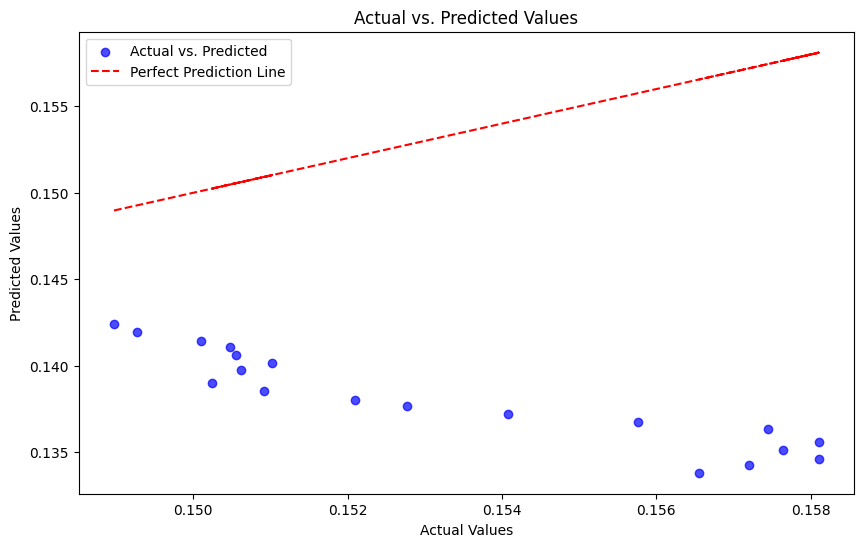

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test['y'], predictions["yhat"], color='blue', label='Actual vs. Predicted', alpha=0.7)
plt.plot(test['y'], test['y'], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

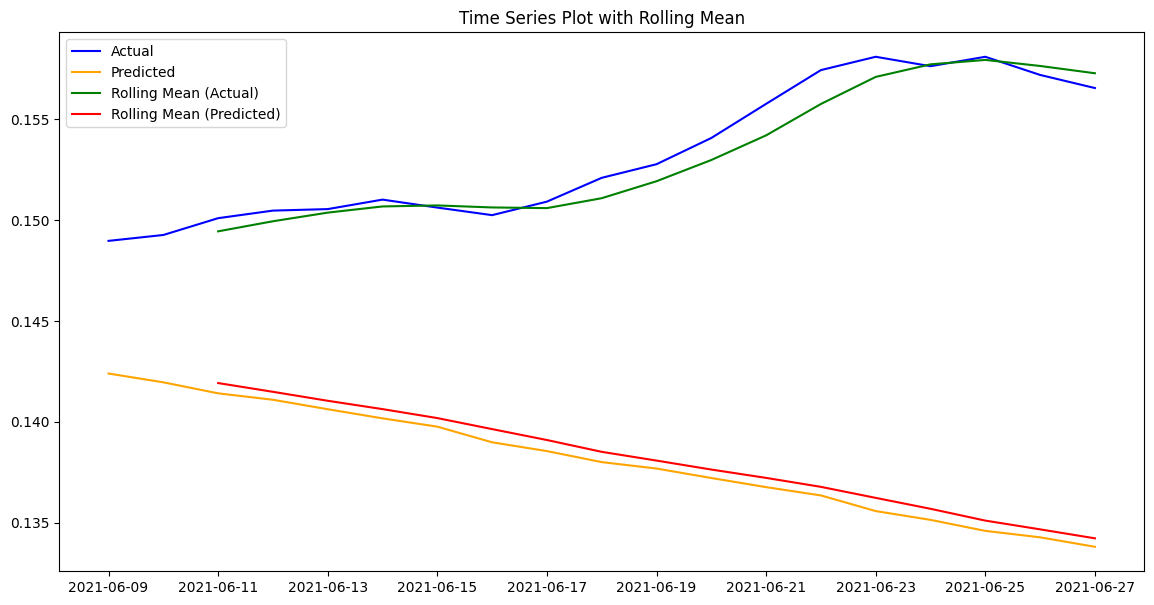

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['y'], label='Actual', color='blue')
plt.plot(predictions.index, predictions["yhat"], label='Predicted', color='orange')
rolling_mean_actual = test['y'].rolling(window=3).mean()
plt.plot(test.index, rolling_mean_actual, label='Rolling Mean (Actual)', color='green')
rolling_mean_predicted = predictions["yhat"].rolling(window=3).mean()
plt.plot(predictions.index, rolling_mean_predicted, label='Rolling Mean (Predicted)', color='red')
plt.legend(loc='upper left')
plt.title('Time Series Plot with Rolling Mean')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(test['y'], predictions['yhat']))
print("RMSE:", rmse)

RMSE: 0.01621634143479579


In [ ]:
r2 = r2_score(test['y'], predictions['yhat'])
print("R^2:", r2)

R^2: -23.466356309197877


**South-east dataset**


In [ ]:
df = pd.read_csv('/content/old_working.csv', index_col='Time', parse_dates=True)
df

,Price
Time,
2021-03-27,0.1425
2021-03-28,0.1445
2021-03-29,0.1456
2021-03-30,0.1519
2021-03-31,0.1526
...,...
2021-06-20,0.1683
2021-06-21,0.1688
2021-06-22,0.1693


In [ ]:
df = df[["Price"]]

In [ ]:
df= df.reset_index()

In [ ]:
df = df.rename(columns = {"Time":"ds","Price":"y"})

In [ ]:
df

,ds,y
0,2021-03-27,0.1425
1,2021-03-28,0.1445
2,2021-03-29,0.1456
3,2021-03-30,0.1519
4,2021-03-31,0.1526
...,...,...
85,2021-06-20,0.1683
86,2021-06-21,0.1688
87,2021-06-22,0.1693
88,2021-06-23,0.1689


In [ ]:
train = df.iloc[:72]
test = df.iloc[72:]

In [ ]:
m = Prophet() # the Prophet class (model)
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m5mgvwj/gasb7h8j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m5mgvwj/d_13nimv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7523', 'data', 'file=/tmp/tmp8m5mgvwj/gasb7h8j.json', 'init=/tmp/tmp8m5mgvwj/d_13nimv.json', 'output', 'file=/tmp/tmp8m5mgvwj/prophet_modelseuk08xt/prophet_model-20231205235037.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:50:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:50:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
predictions = m.predict(test)
predictions.index=predictions["ds"]
predictions.index = test.index

In [ ]:
test

,y
ds,
2021-06-09,0.142575
2021-06-10,0.142000
2021-06-11,0.141175
2021-06-12,0.140350
2021-06-13,0.139767
2021-06-14,0.139233
2021-06-15,0.137825
2021-06-16,0.135750
2021-06-17,0.135075


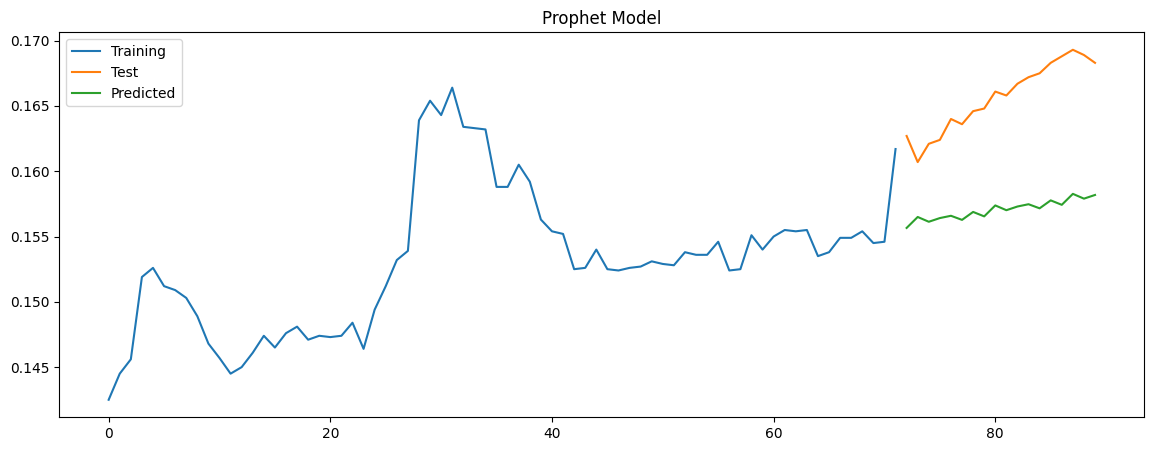

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(train['y'], label='Training')
plt.plot(test['y'], label='Test')
plt.plot(predictions["yhat"], label='Predicted')
plt.legend(loc="upper left")
plt.title('Prophet Model')
plt.show()

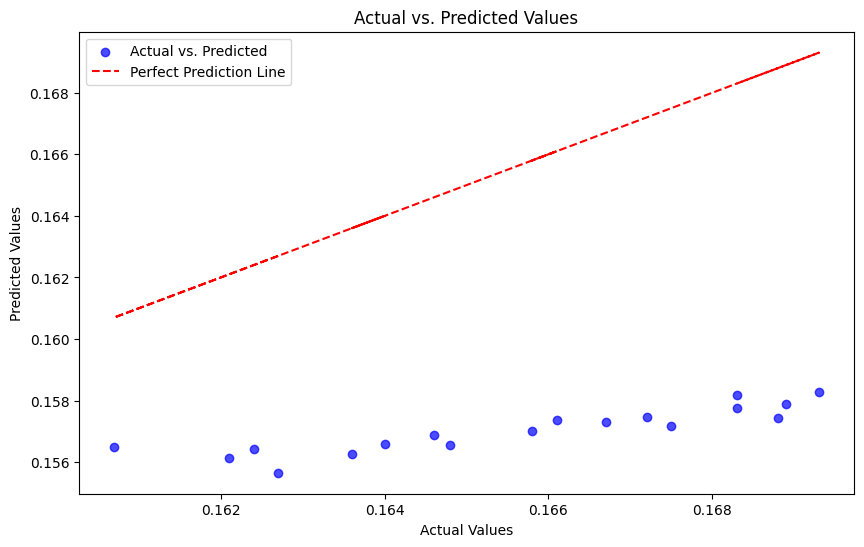

In [ ]:
# Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(test['y'], predictions["yhat"], color='blue', label='Actual vs. Predicted', alpha=0.7)
plt.plot(test['y'], test['y'], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

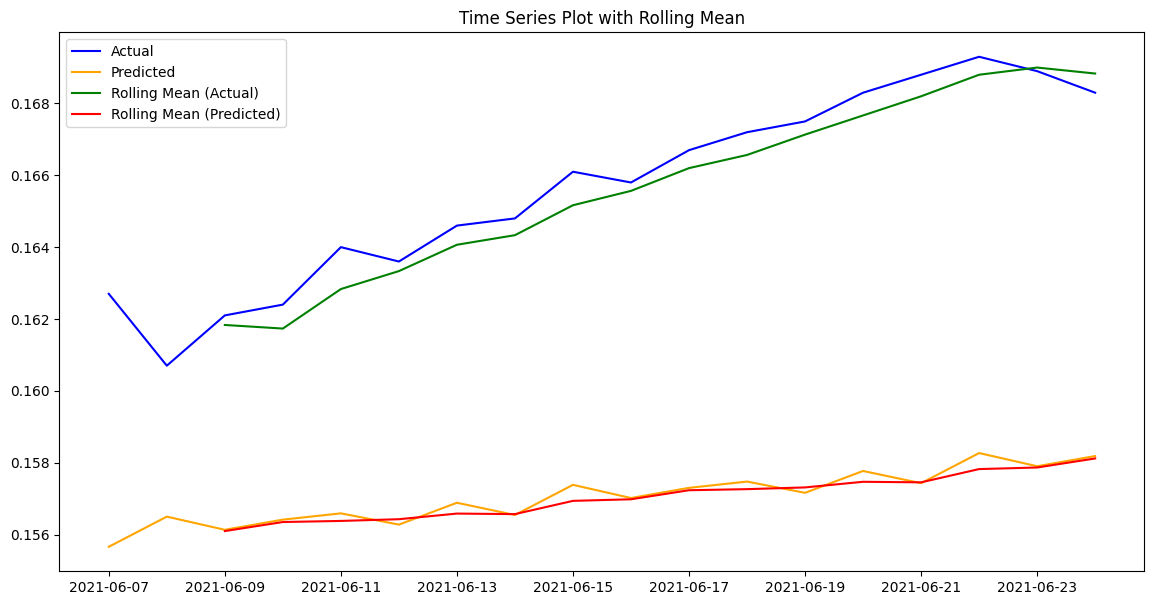

In [ ]:
# Time Series Plot with Rolling Mean
plt.figure(figsize=(14, 7))
plt.plot(test["ds"], test['y'], label='Actual', color='blue')
plt.plot(predictions["ds"], predictions["yhat"], label='Predicted', color='orange')
rolling_mean_actual = test['y'].rolling(window=3).mean()
plt.plot(test["ds"], rolling_mean_actual, label='Rolling Mean (Actual)', color='green')
rolling_mean_predicted = predictions["yhat"].rolling(window=3).mean()
plt.plot(predictions["ds"], rolling_mean_predicted, label='Rolling Mean (Predicted)', color='red')
plt.legend(loc='upper left')
plt.title('Time Series Plot with Rolling Mean')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(test['y'], predictions['yhat']))
print("RMSE:", rmse)

RMSE: 0.008829686117391941


In [ ]:
r2 = r2_score(test['y'], predictions['yhat'])
print("R^2:", r2)

R^2: -10.682388470224884
